Notebook to test some basic functionalities

In [1]:
import matplotlib.pyplot as plt
from connections import Connections
from get_nodes_data import get_neuron_bodyids
from neuron import Neuron

Perform synaptic based representation.
Allows to test the data loading and preprocessing fro the Neuron class and the Connections class.

In [2]:
# Data loading testing
MDNs = []
neurons_pre = get_neuron_bodyids({'type:string': 'MDN'})

Synapse data not loaded. Loading now...
... Synapse data loaded.


/home/hurtak/vnc_networks/vnc_networks/neuron.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synapses[attribute] = synapses[attribute].astype(str).values


{'ANm': 0, 'IntTct': 1, 'LegNp(T1)(L)': 2, 'LegNp(T2)(L)': 3, 'LegNp(T3)(L)': 4, 'None': 5, nan: -1}
Synapse data not loaded. Loading now...
... Synapse data loaded.


/home/hurtak/vnc_networks/vnc_networks/neuron.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synapses[attribute] = synapses[attribute].astype(str).values


{'ANm': 0, 'IntTct': 1, 'LegNp(T1)(L)': 2, 'LegNp(T2)(L)': 3, 'LegNp(T3)(L)': 4, 'None': 5, nan: -1}
Synapse data not loaded. Loading now...
... Synapse data loaded.


/home/hurtak/vnc_networks/vnc_networks/neuron.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synapses[attribute] = synapses[attribute].astype(str).values


{'ANm': 0, 'IntTct': 1, 'LTct': 2, 'LegNp(T1)(R)': 3, 'LegNp(T2)(R)': 4, 'LegNp(T3)(R)': 5, nan: -1}
Synapse data not loaded. Loading now...
... Synapse data loaded.


/home/hurtak/vnc_networks/vnc_networks/neuron.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synapses[attribute] = synapses[attribute].astype(str).values


{'ANm': 0, 'IntTct': 1, 'LegNp(T1)(R)': 2, 'LegNp(T2)(R)': 3, 'LegNp(T3)(R)': 4, nan: -1}


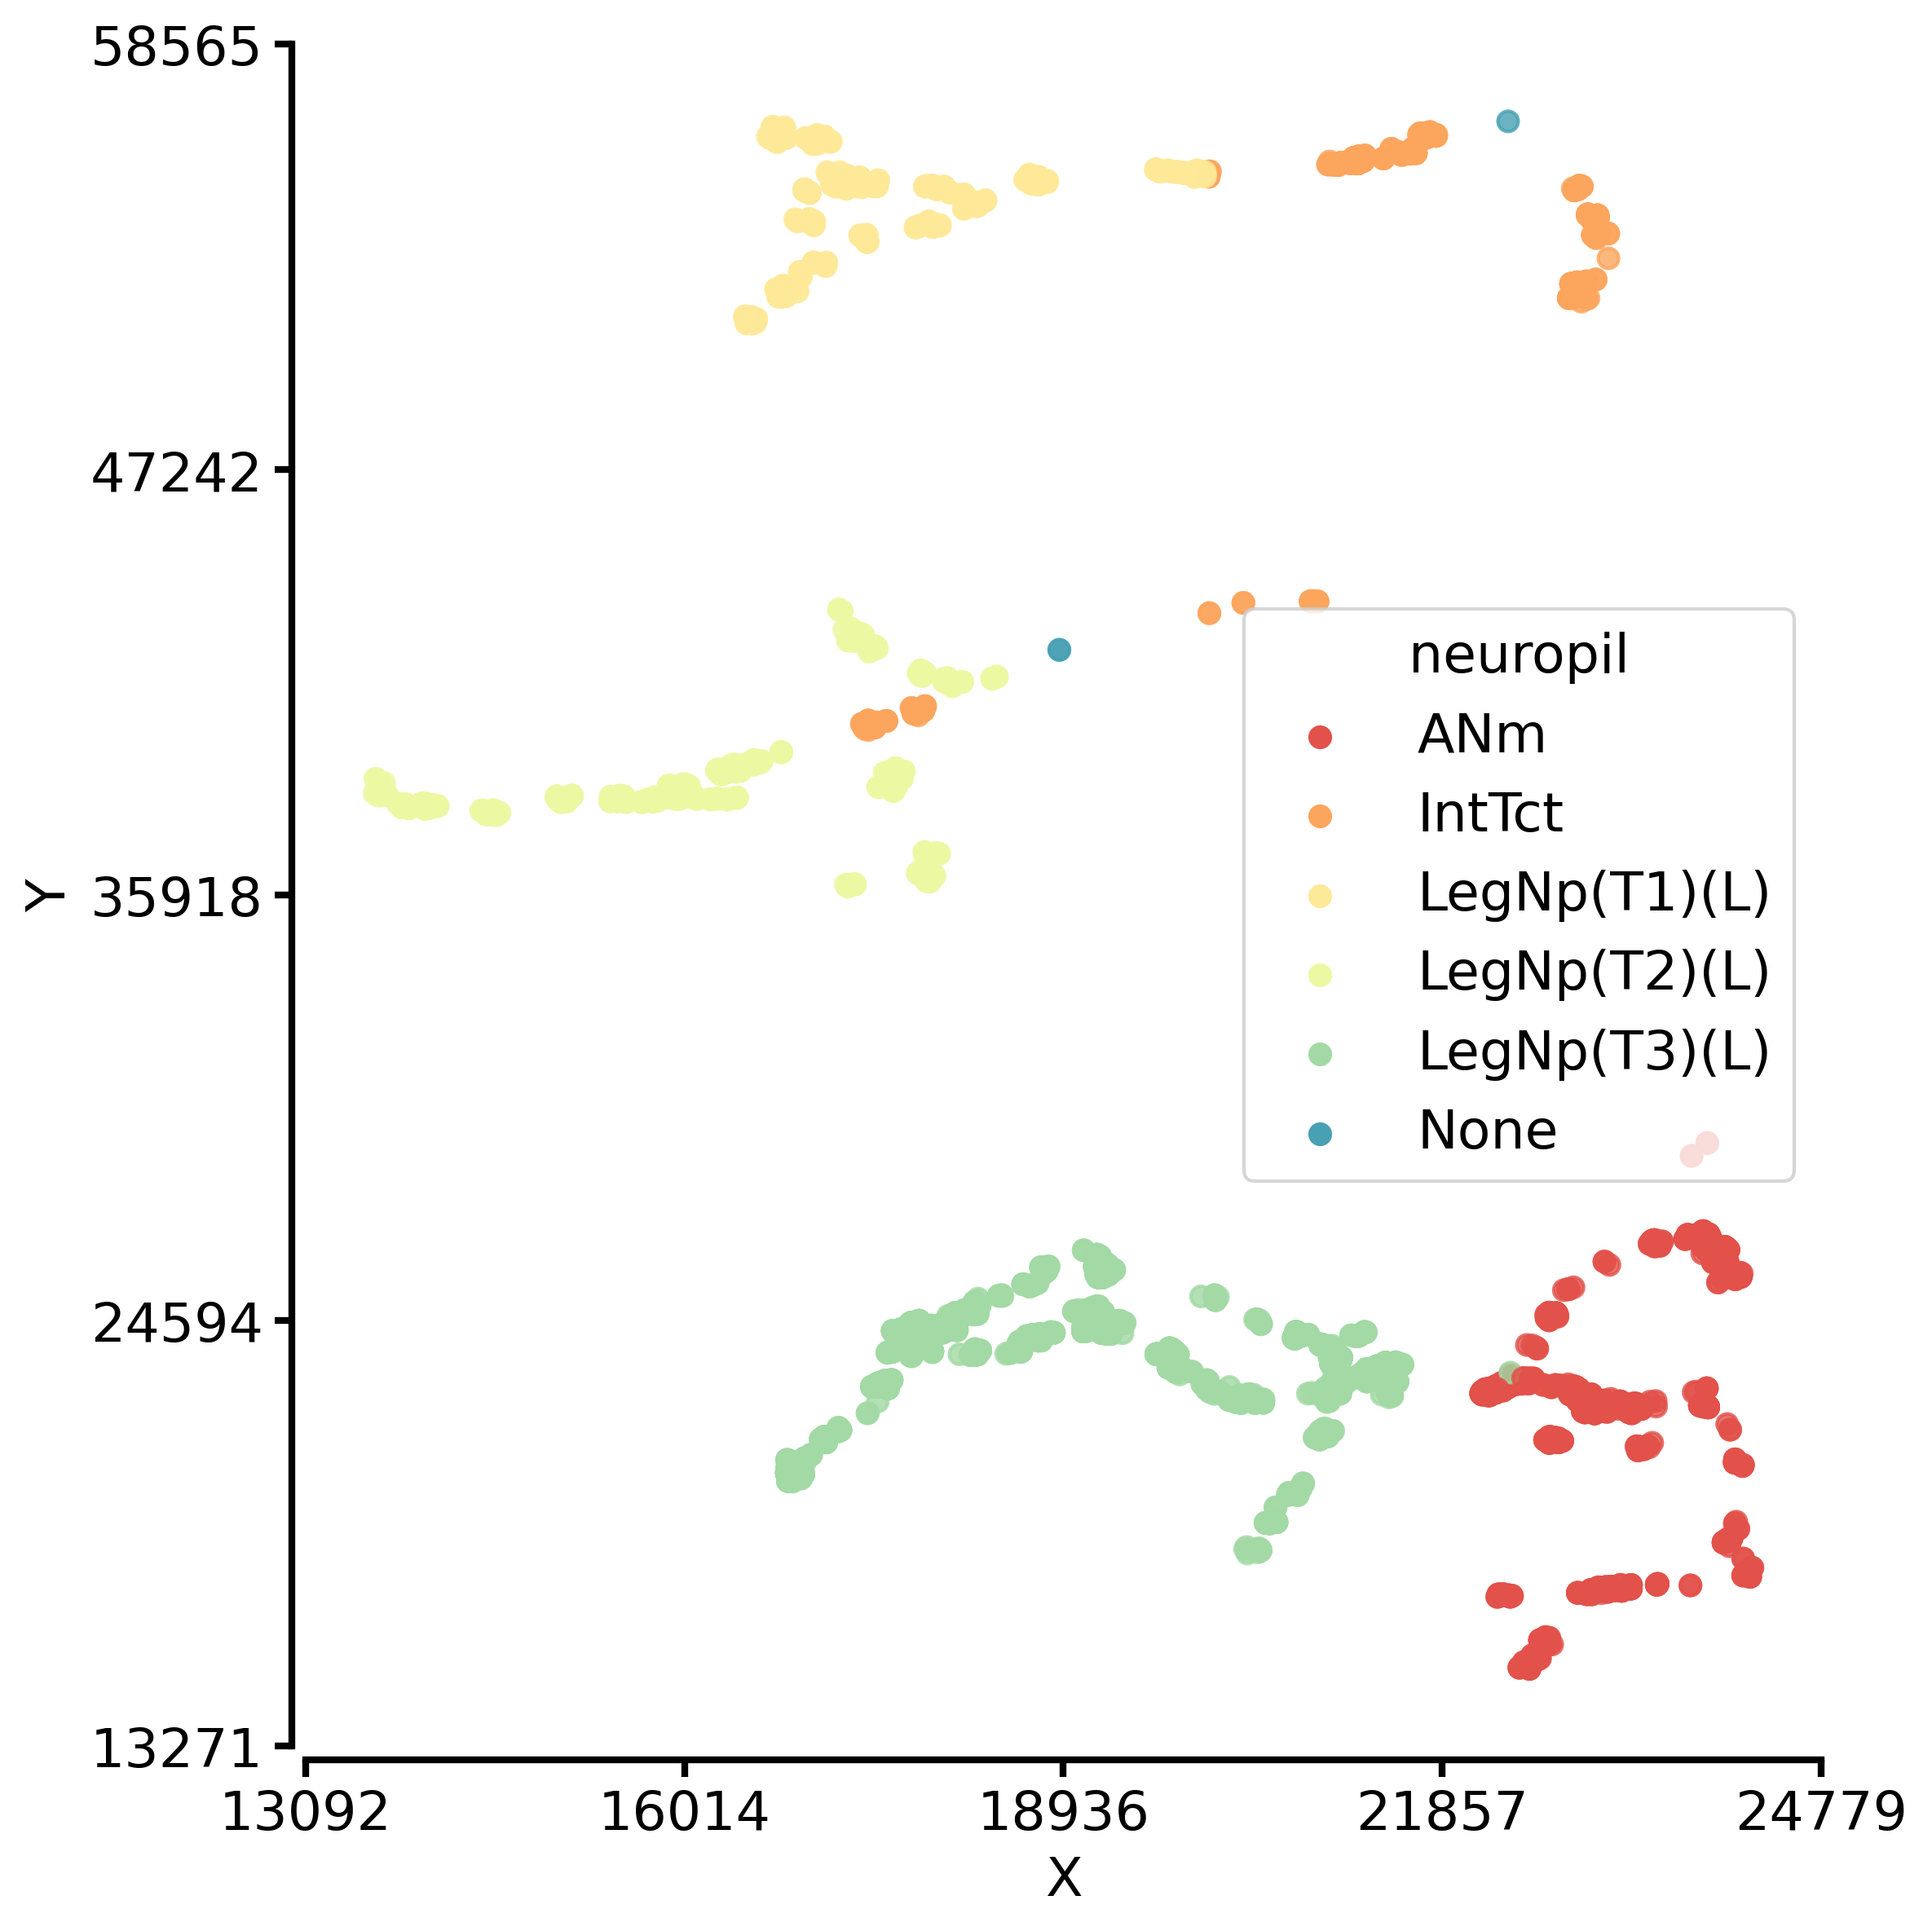

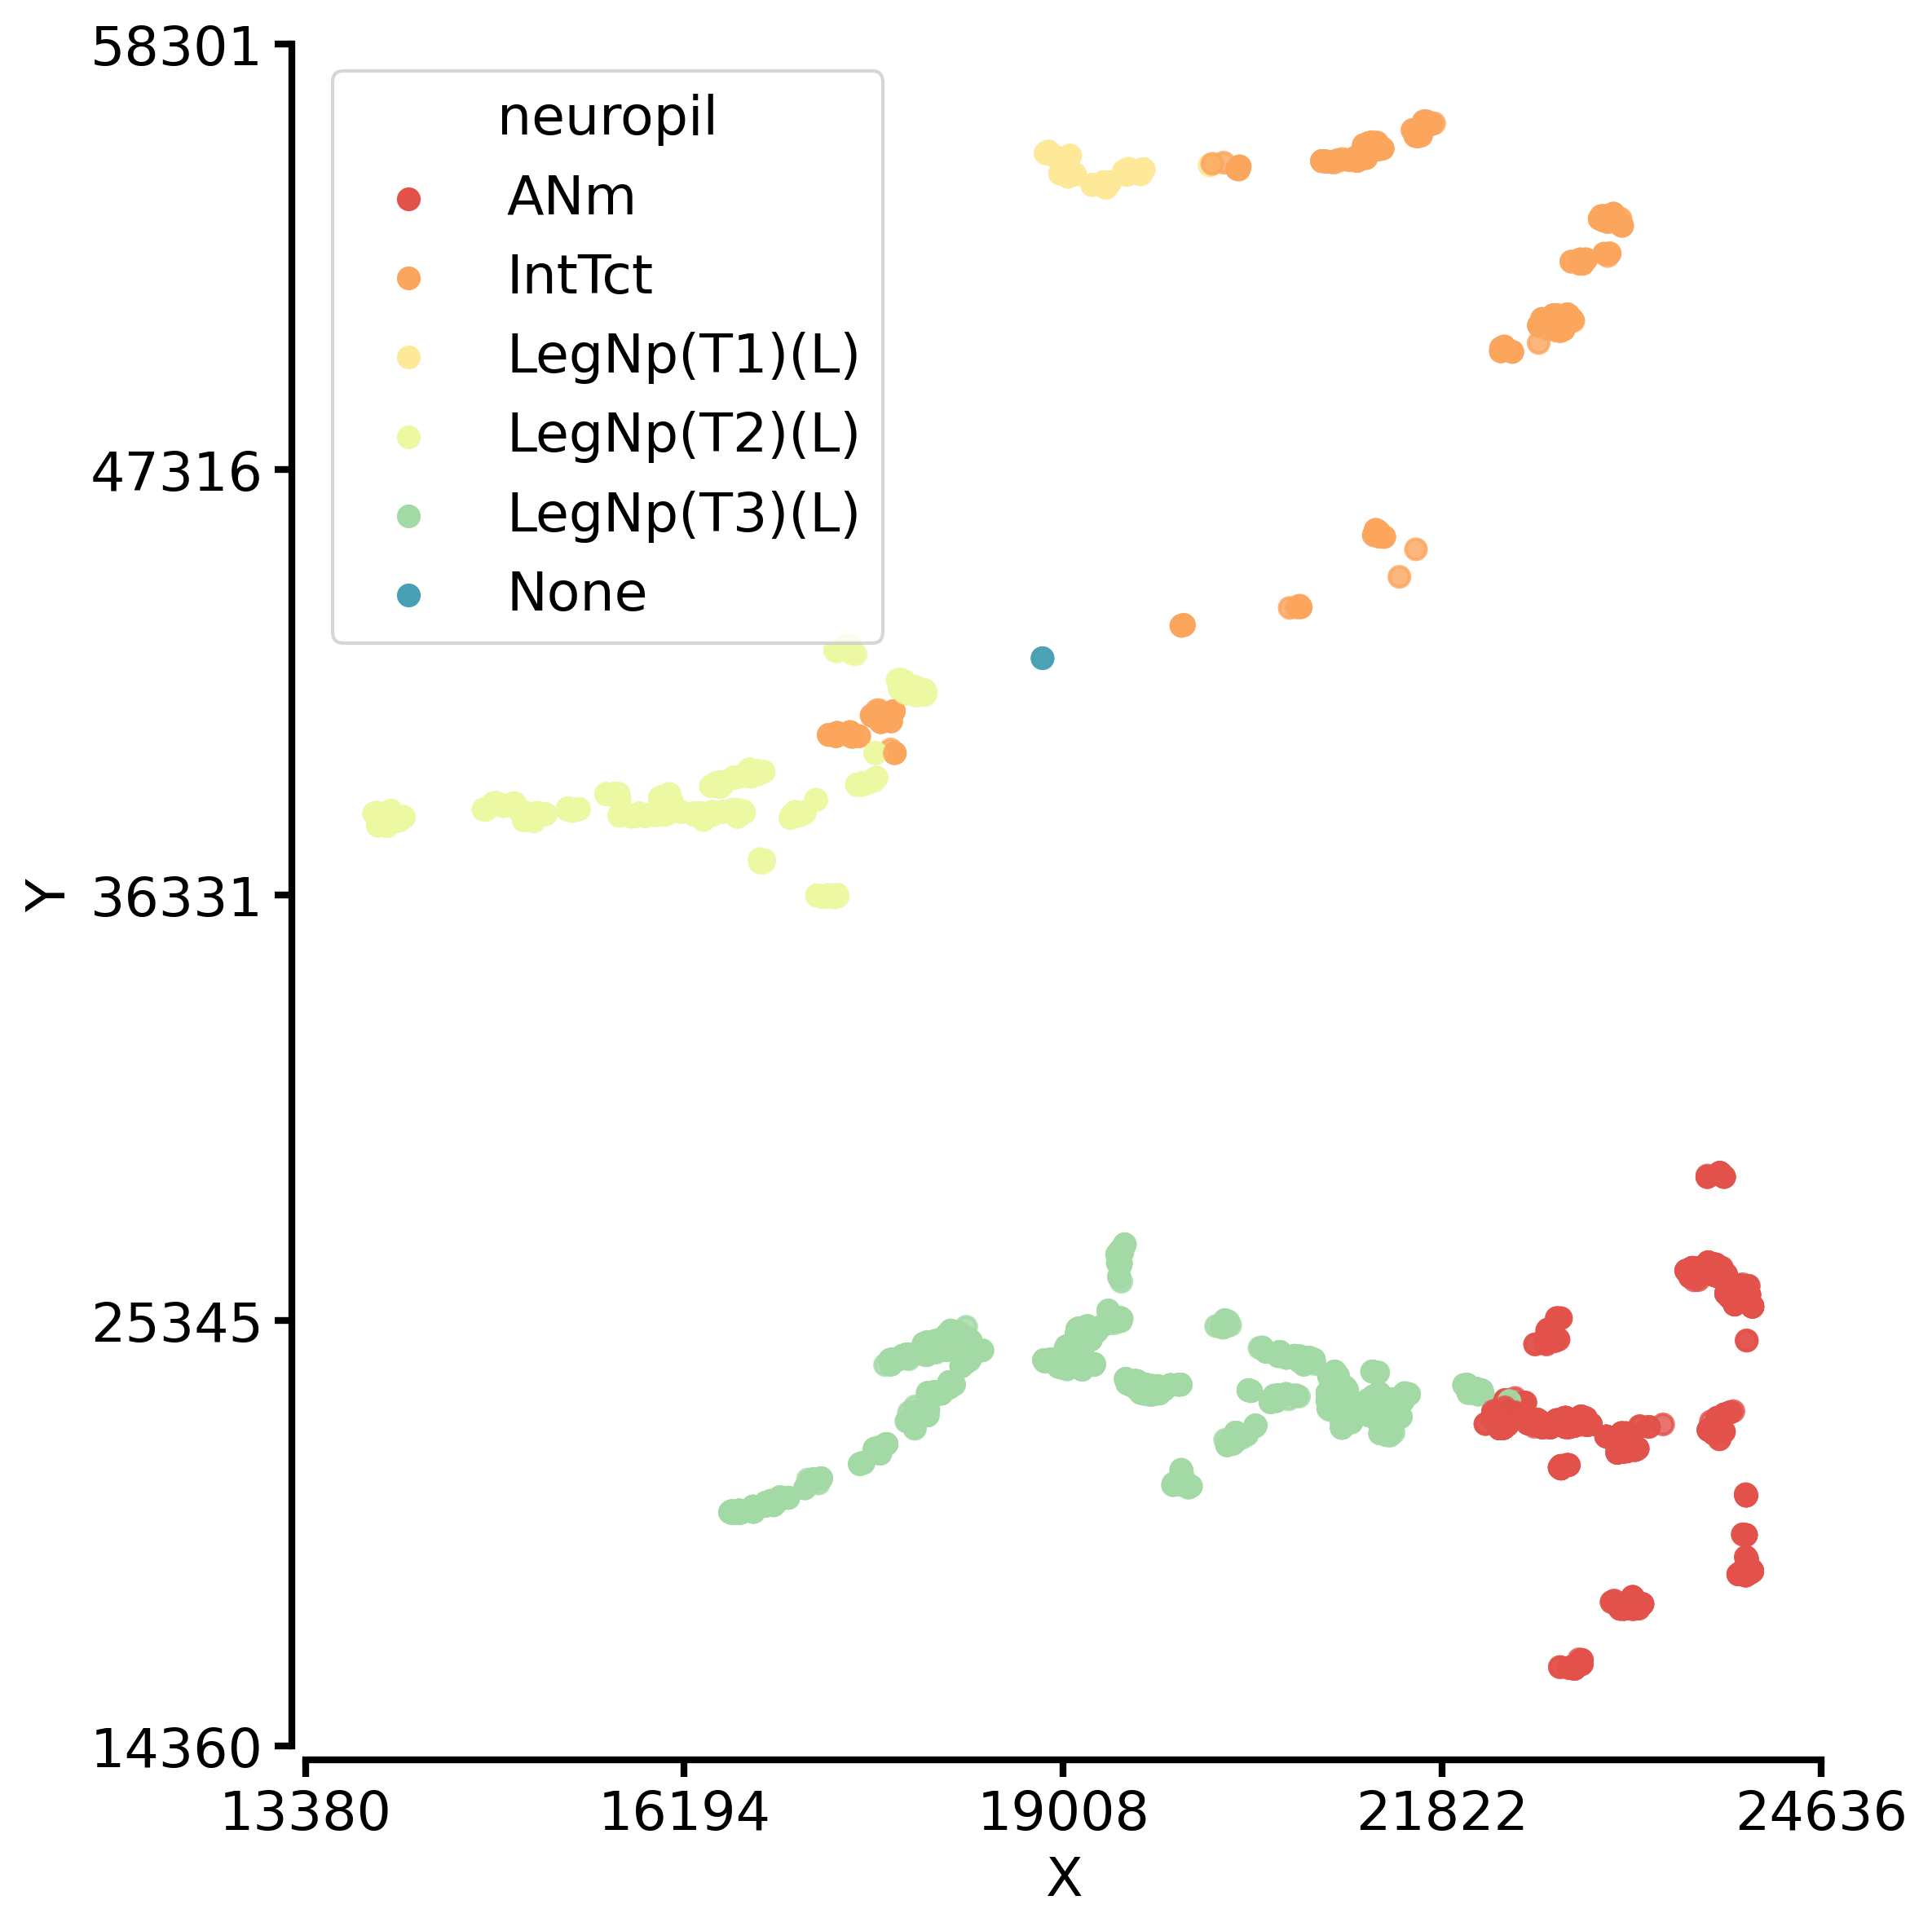

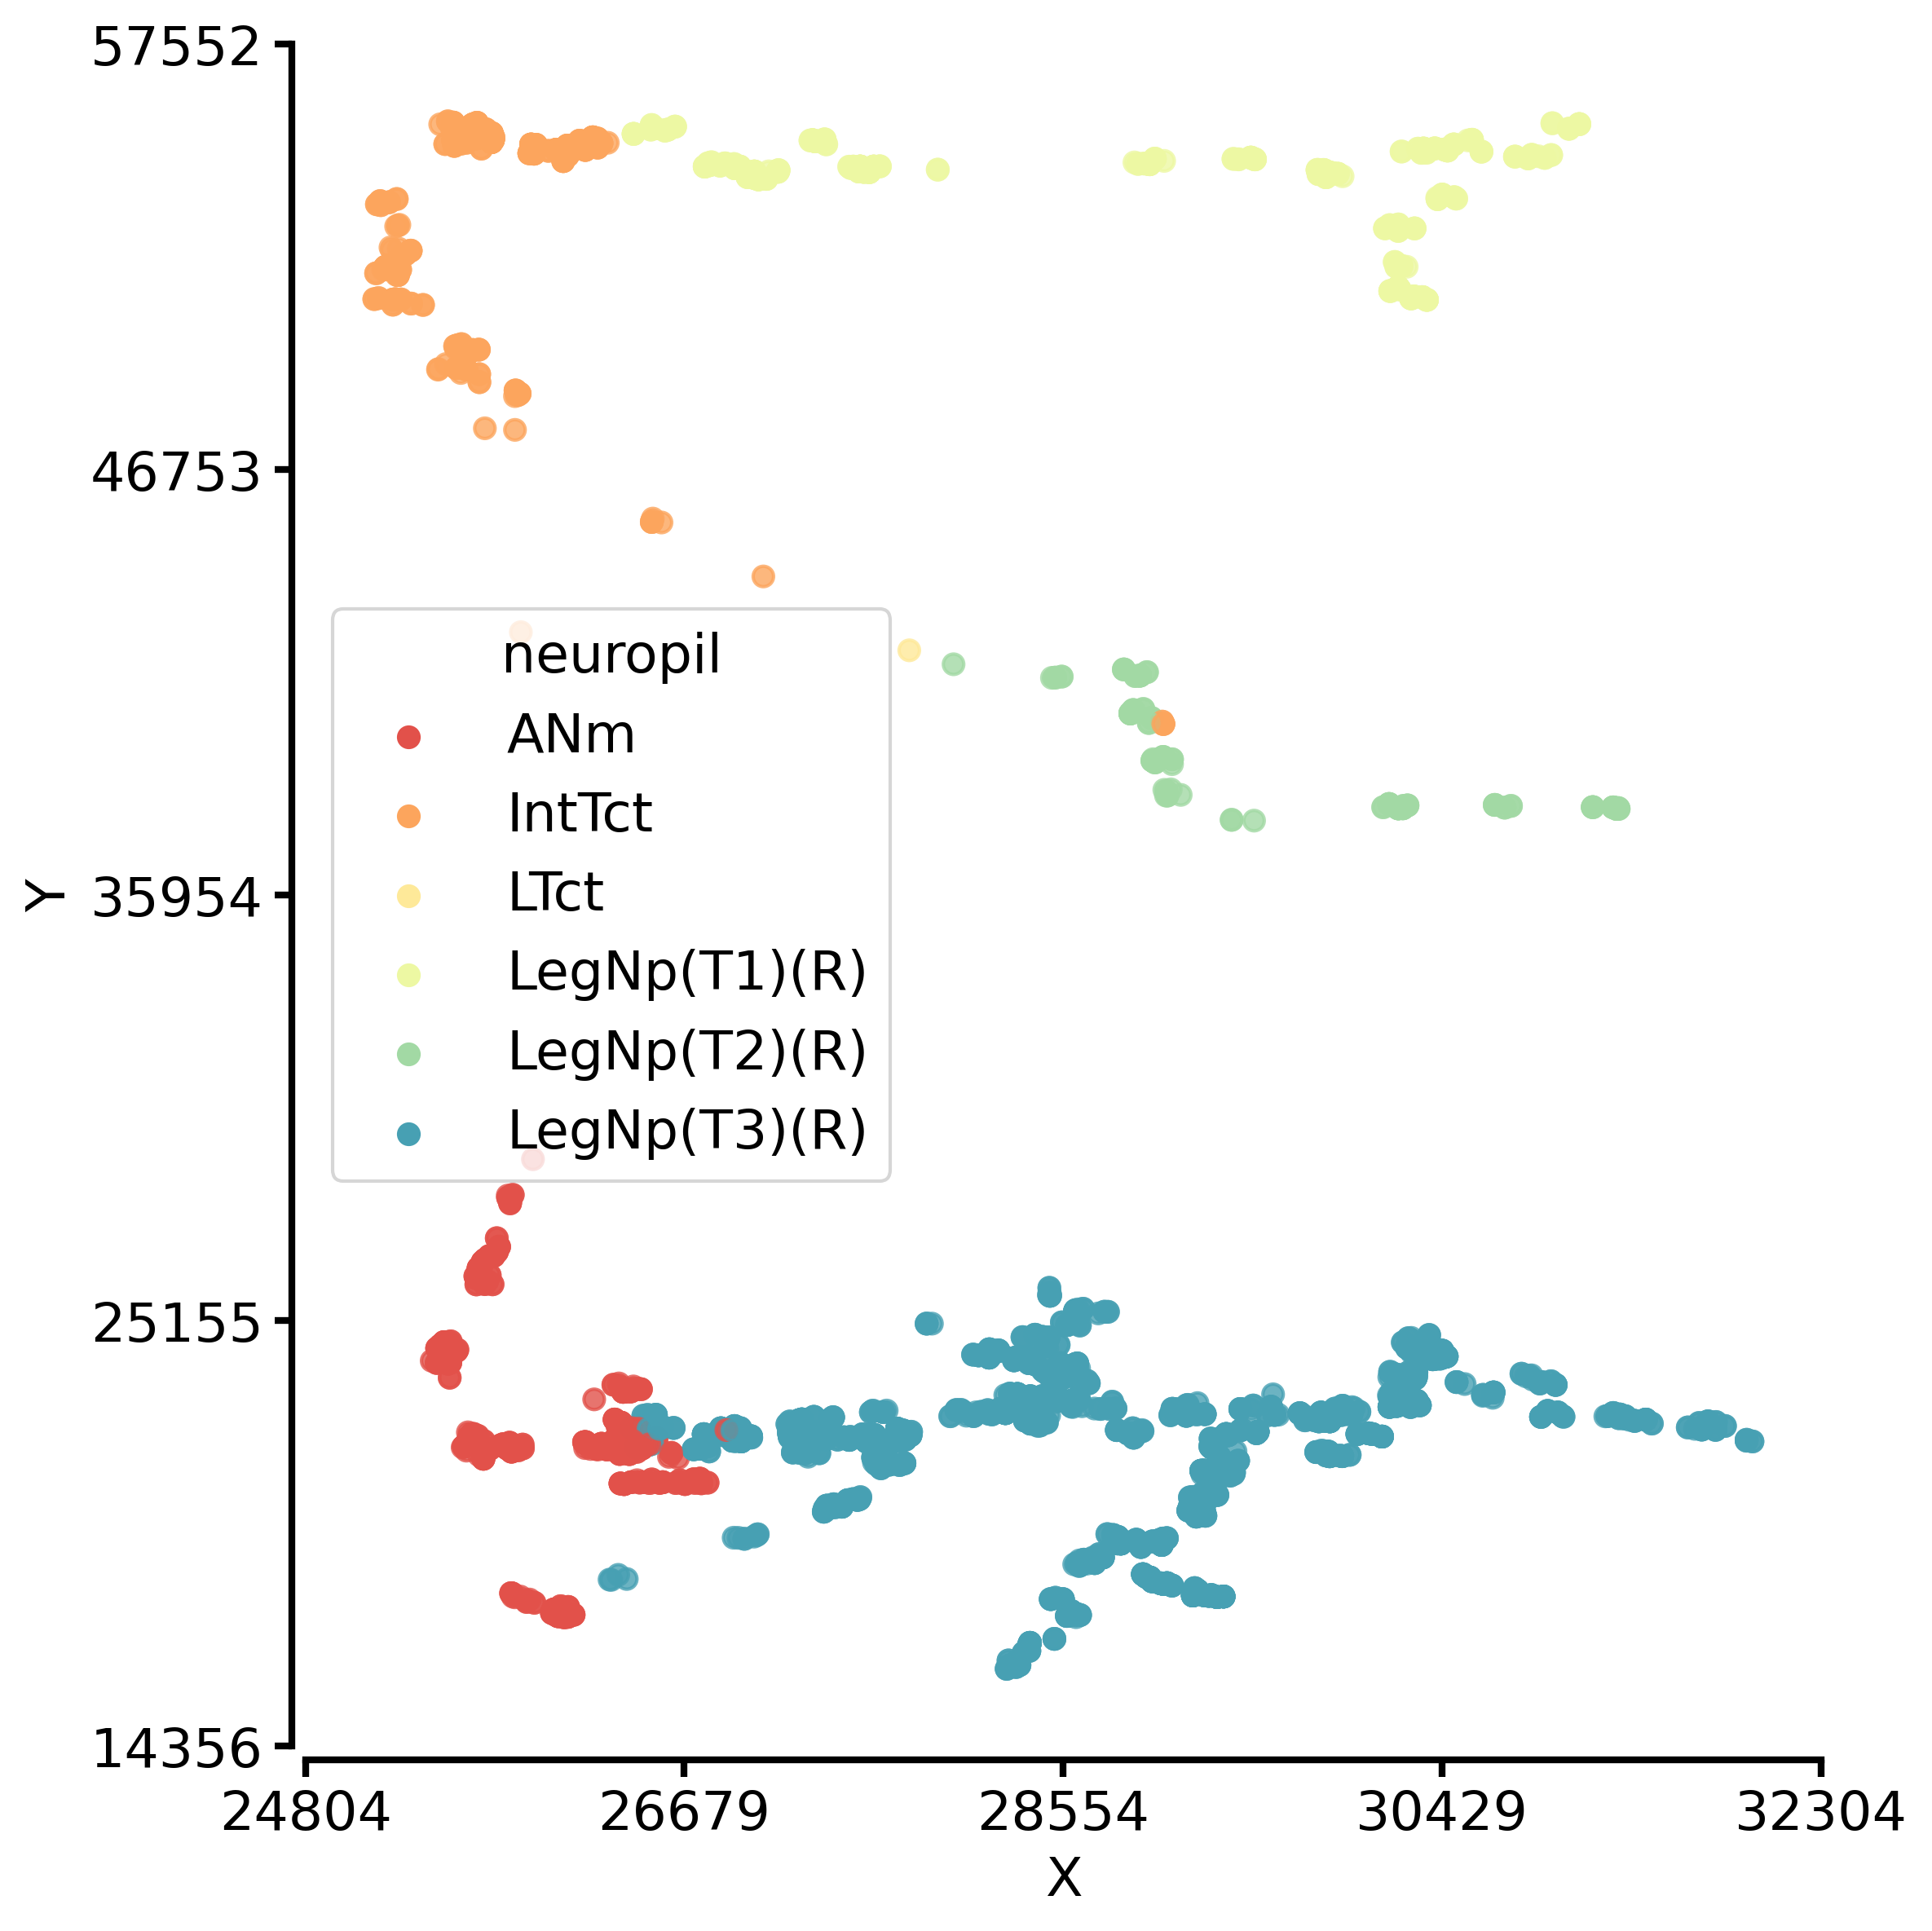

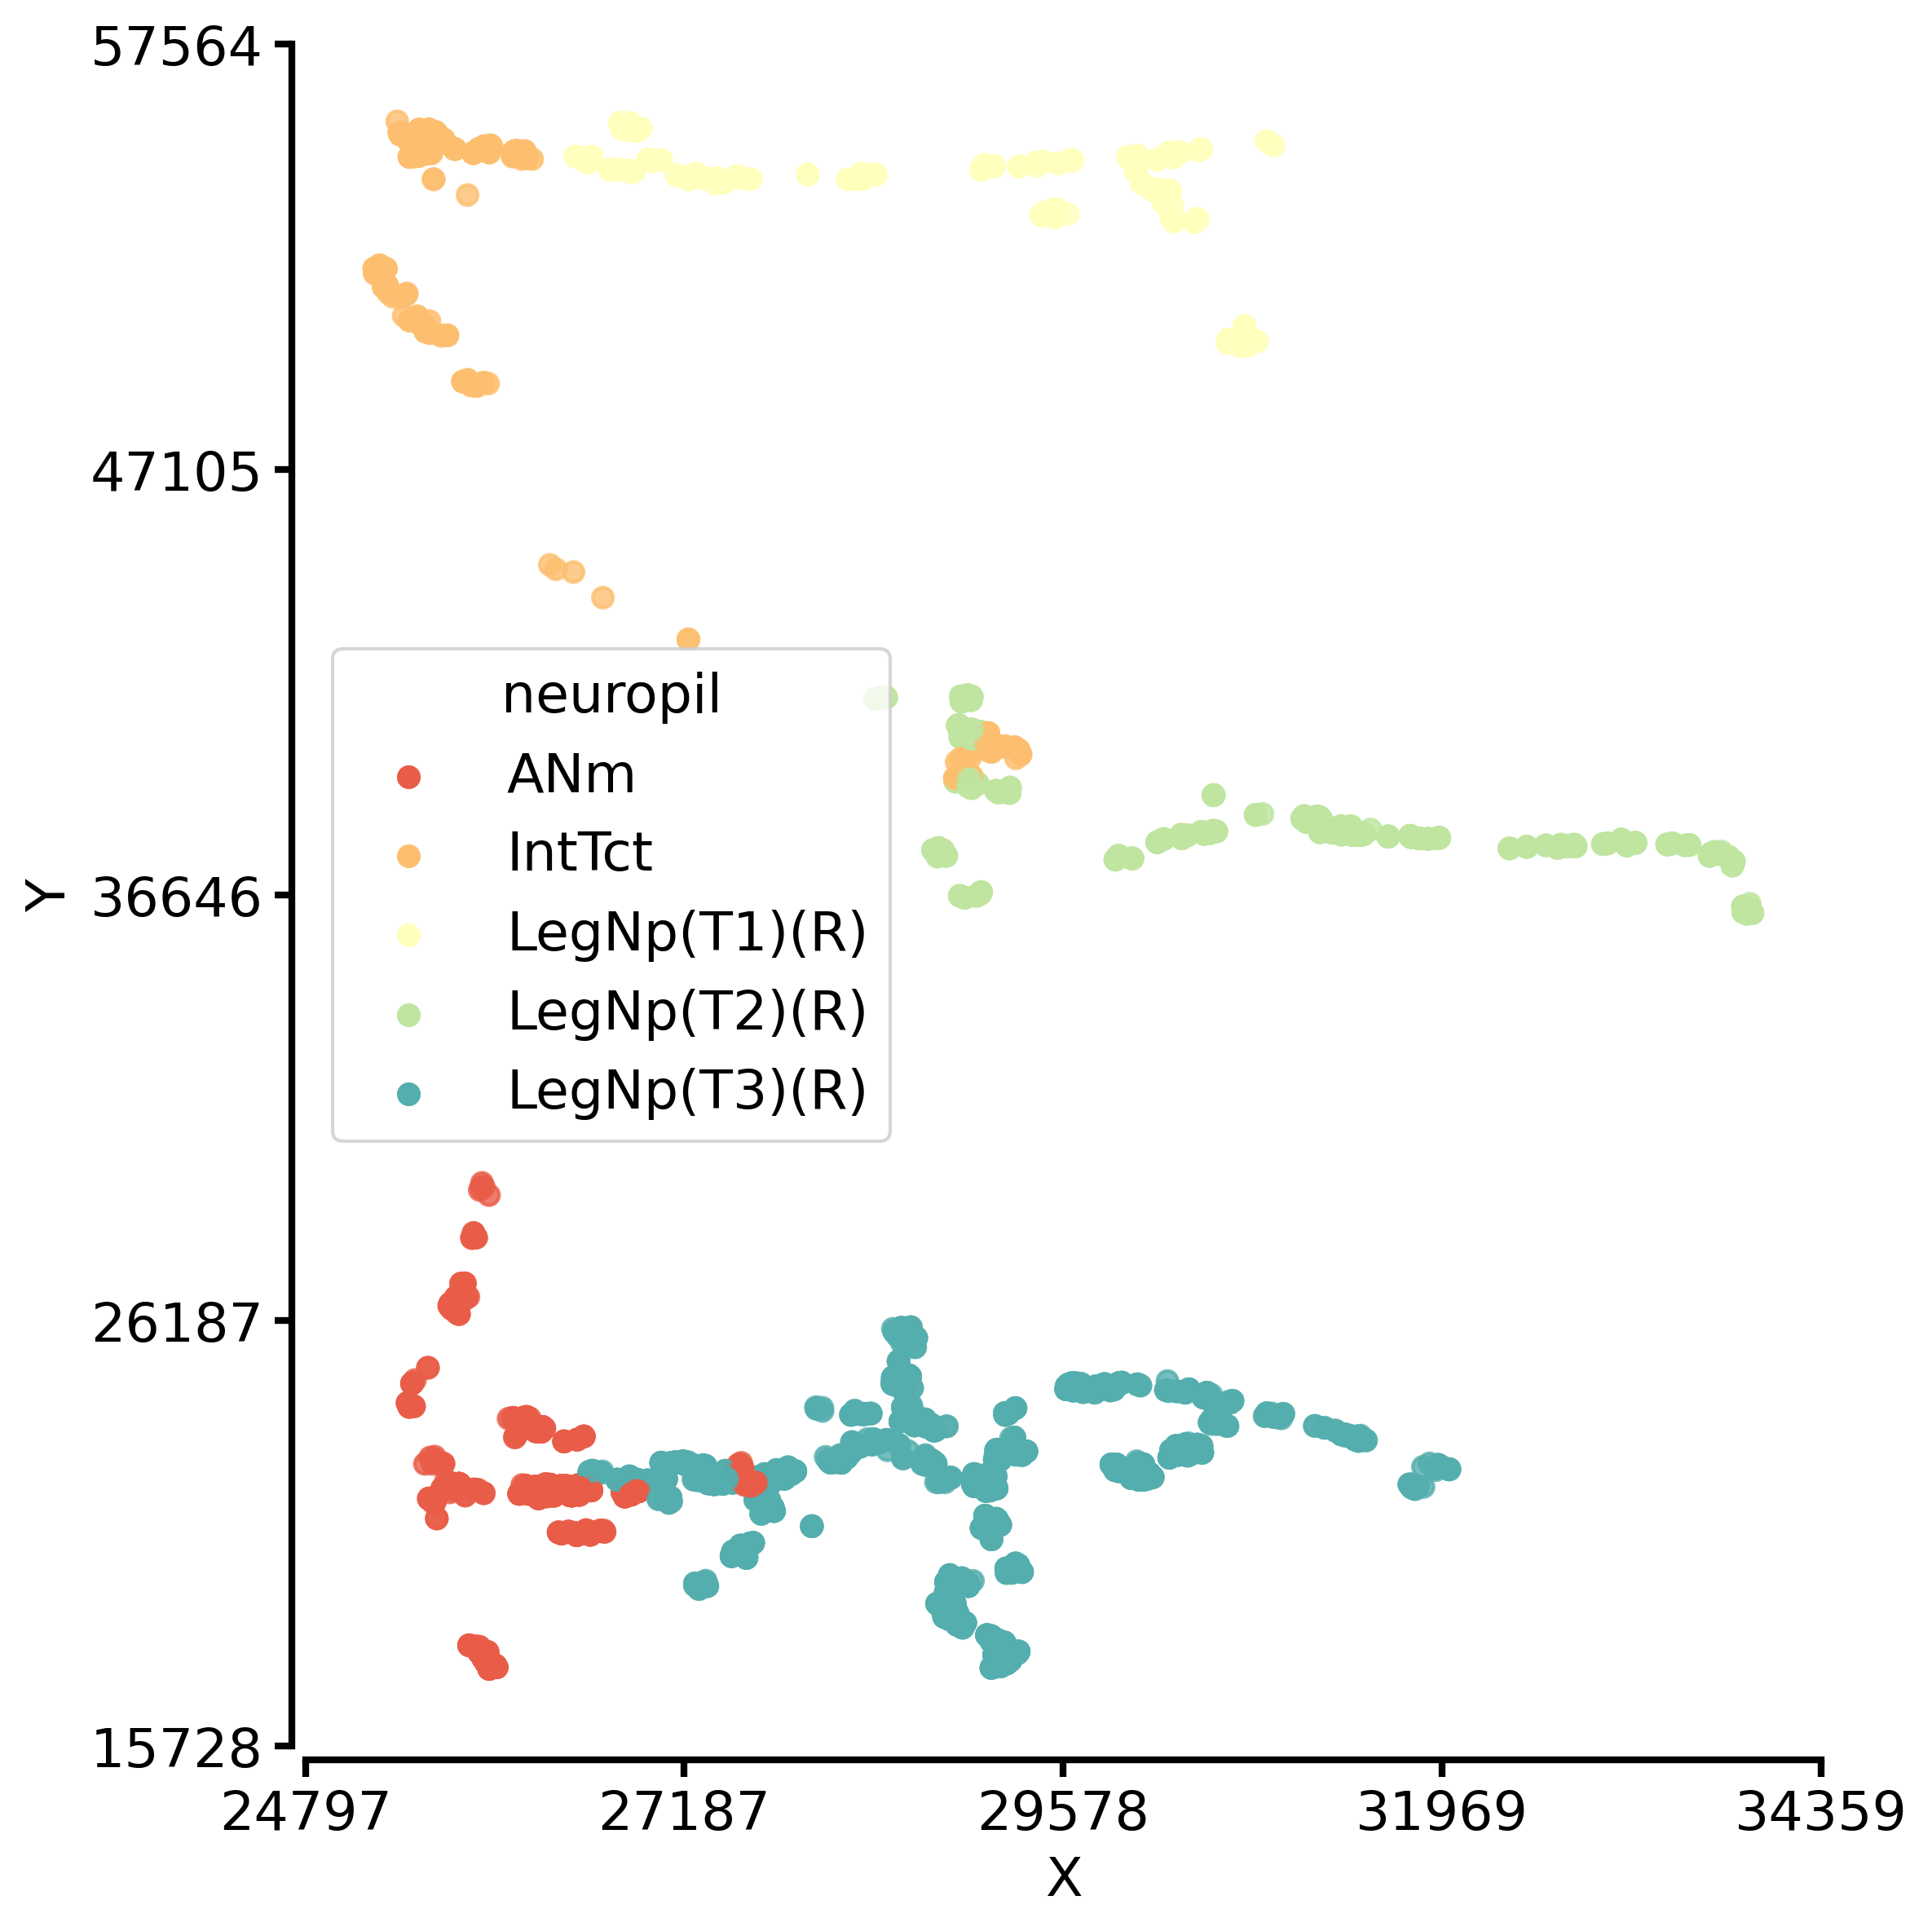

In [3]:
# Neuron class testing
for i in range(4):
    MDN = Neuron(neurons_pre[i])
    _ = MDN.get_synapse_distribution(threshold=True)
    #MDN.cluster_synapses_spatially(n_clusters=3)
    #MDN.create_synapse_groups(attribute='KMeans_cluster')
    MDN.create_synapse_groups(attribute='neuropil')
    _ = MDN.plot_synapse_distribution(
        color_by='neuropil',
        discrete_coloring=True,
        threshold=True,
        cmap="Spectral")
    MDNs.append(MDN)

In [4]:
# Connections class testing
from connections import Connections

VNC = Connections(split_neurons=MDNs)  # full VNC

Attribute class:string not found in the graph. Adding it.
Attribute status:string not found in the graph. Adding it.
Attribute class:string not found in the graph. Adding it.


Attribute class:string not found in the graph. Adding it.


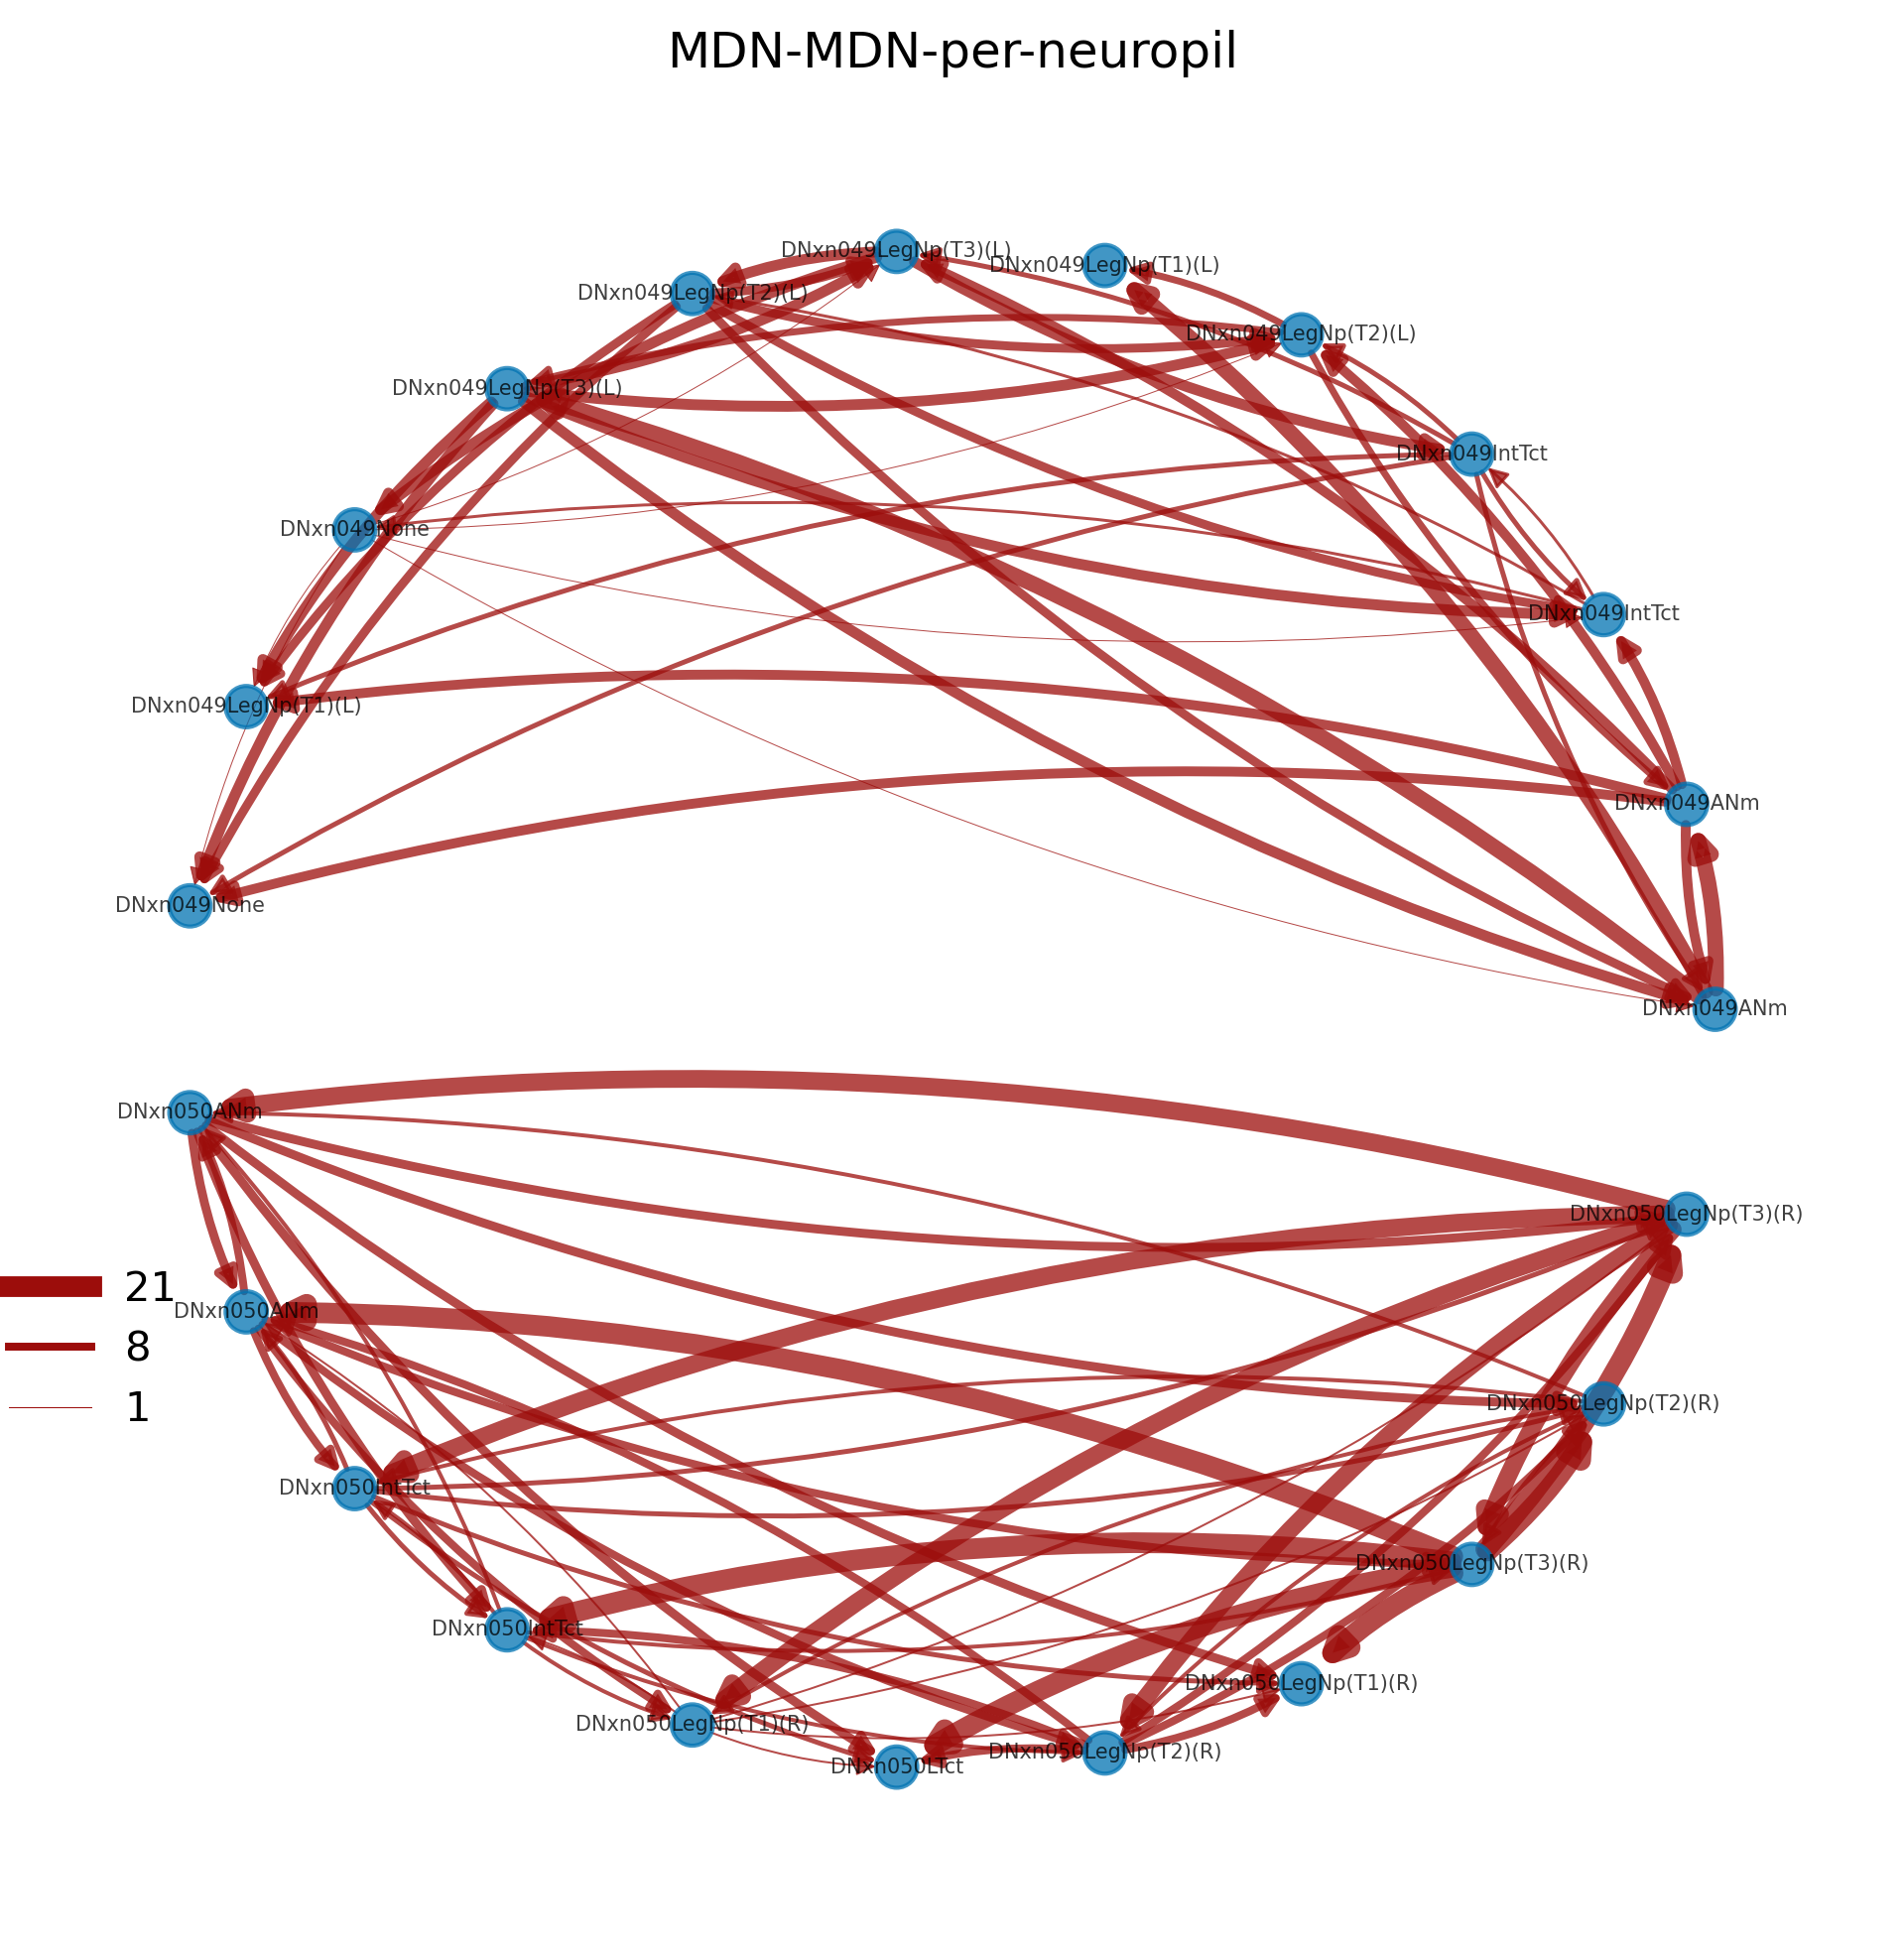

In [5]:
mdn_uids = VNC.get_neuron_ids({'type:string': 'MDN'})
mdn_connections = VNC.subgraph(nodes=mdn_uids)
mdn_connections.display_graph(
    label_nodes=True,
    title='MDN-MDN-per-neuropil',
    save = False
    )
plt.show()